In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import math
import os
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from icecream import ic
from sklearn.datasets import load_iris
import zipfile as zp
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [39]:
dataset=pd.read_csv("D:/HALDEN/downloads/titanic-passengers.csv", sep=";")
ic(dataset.shape)
dataset.head(10)

ic| dataset.shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [40]:
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male':1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes':1,'No':0}},inplace=True)
    return new_data

data=preprocess_data(dataset)

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,S


In [41]:
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]


In [42]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [43]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,343,2,1,28.000000,0,0,13.0000
1,76,3,1,25.000000,0,0,7.6500
2,641,3,1,20.000000,0,0,7.8542
3,568,3,0,29.000000,0,4,21.0750
4,672,1,1,31.000000,1,0,52.0000
...,...,...,...,...,...,...,...
886,10,2,0,14.000000,1,0,30.0708
887,61,3,1,22.000000,0,0,7.2292
888,535,3,0,30.000000,0,0,8.6625
889,102,3,1,29.699118,0,0,7.8958


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

In [45]:
tree=tree.DecisionTreeClassifier()
model=tree.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("score:{}".format(accuracy_score(y_test,y_pred)))

score:0.7653631284916201


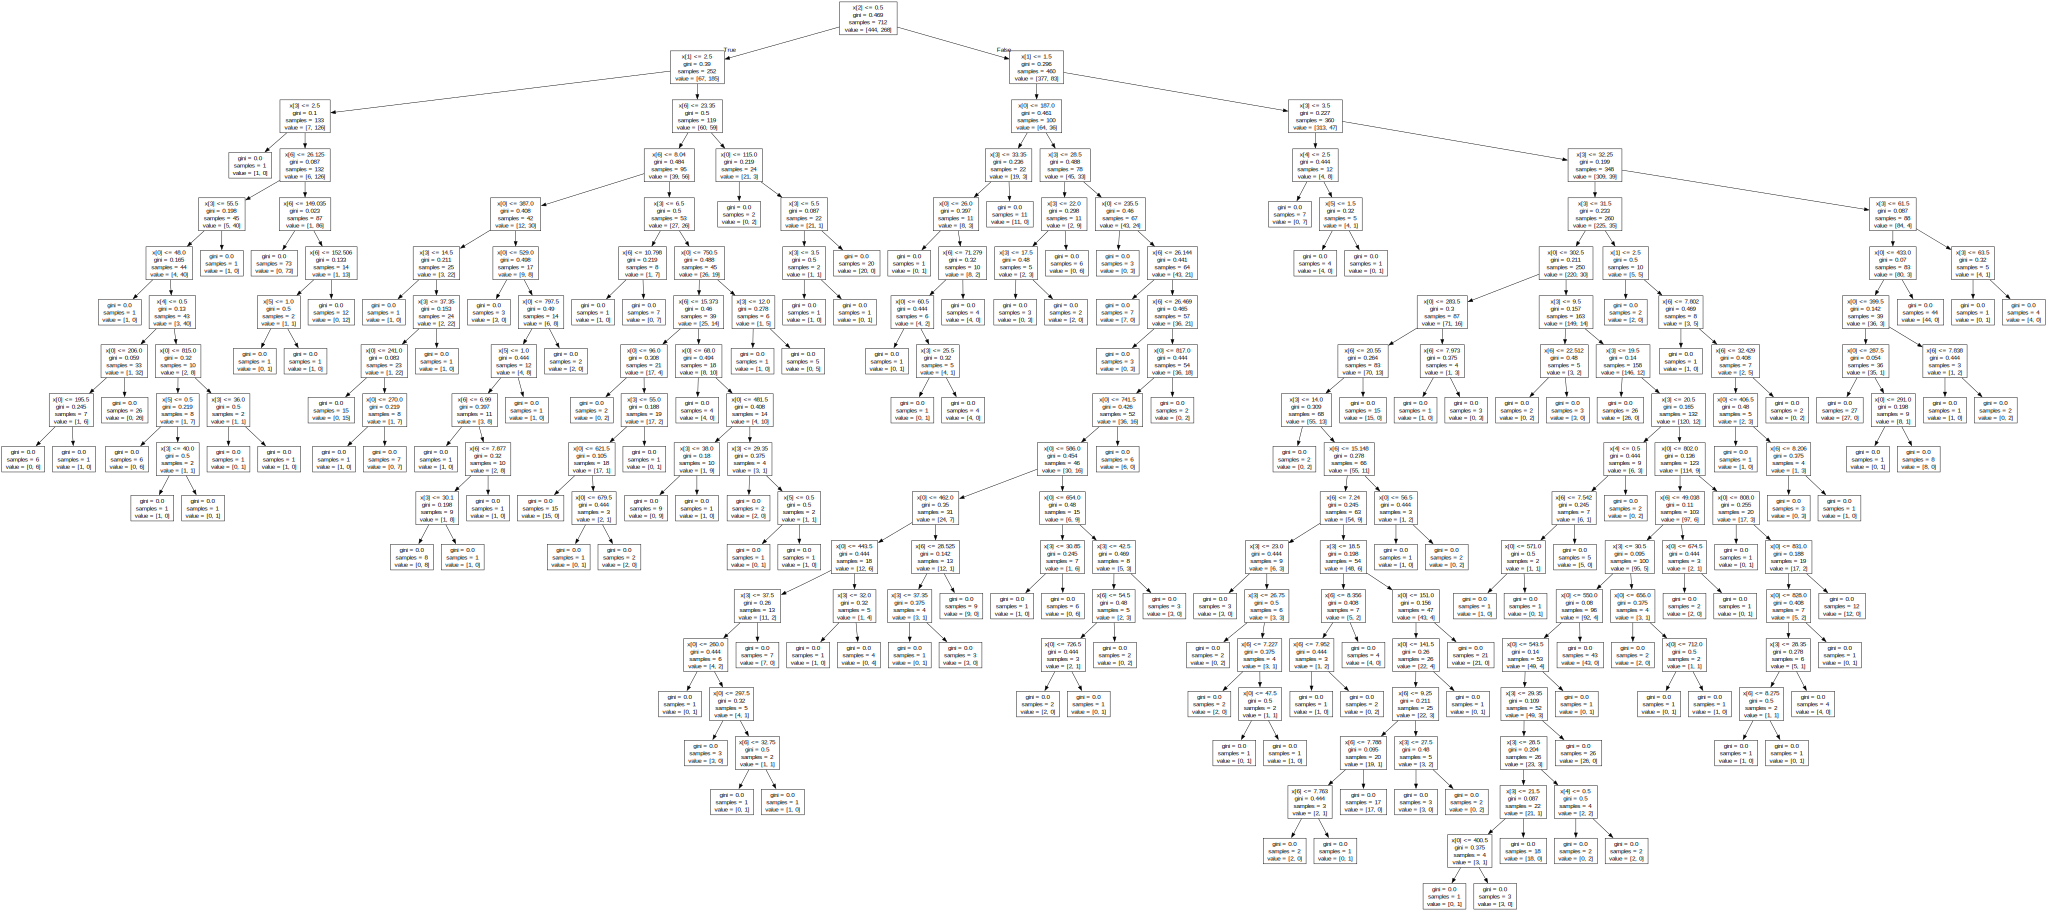

In [46]:
from sklearn import tree
import graphviz
dot_data=tree.export_graphviz(model,out_file=None)
graph=graphviz.Source(dot_data)
graph.render('data')
graph

In [47]:
from sklearn import tree
dtree=tree.DecisionTreeClassifier(criterion='gini',splitter='random',max_leaf_nodes=10,min_samples_leaf=5,max_depth=5)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=5,
                       splitter='random')

In [48]:
x_train


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
57,117,3,1,70.5,0,0,7.7500
717,478,3,1,29.0,1,0,7.0458
431,4,1,0,35.0,1,0,53.1000
633,35,1,1,28.0,1,0,82.1708
163,859,3,0,24.0,0,3,19.2583
...,...,...,...,...,...,...,...
369,52,3,1,21.0,0,0,7.8000
320,395,3,0,24.0,0,2,16.7000
527,58,3,1,28.5,0,0,7.2292
125,314,3,1,28.0,0,0,7.8958


In [57]:
y_1=np.array(y)

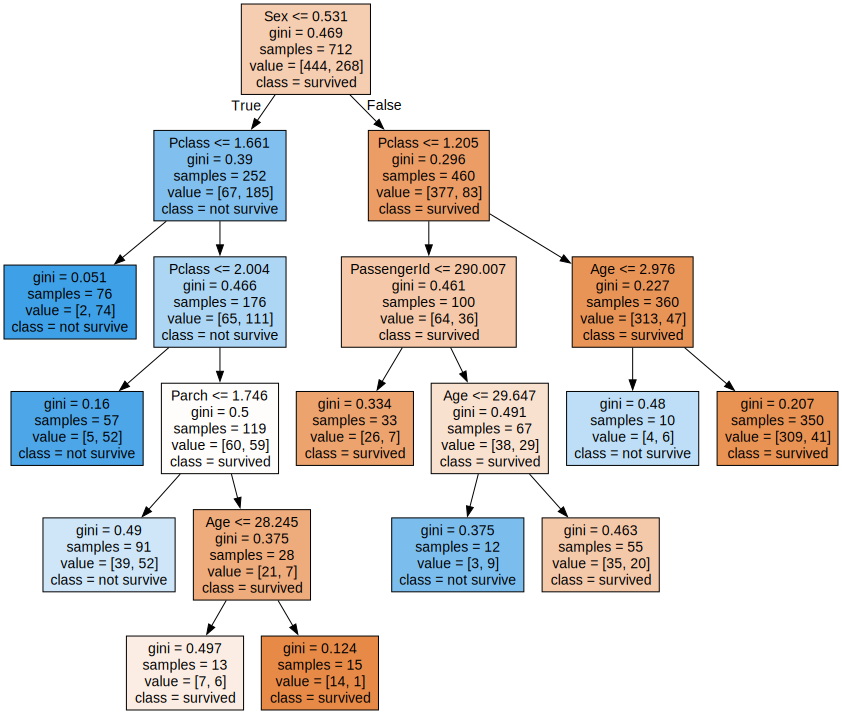

In [59]:
dot_data=tree.export_graphviz(dtree,out_file=None,feature_names=x.columns,class_names=['survived','not survive'],filled=True)
graph=graphviz.Source(dot_data,format="png")
graph

From the data above it looks like non of them had a pure set the lowest of the gini impurities was that of the pPclass used to identify those that did not survive with a gini impurity of  0.051

In [60]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dtree,x,y,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.81 (+/- 0.06)


the  data above tells us that the accuracy of the decision tree is o.81 with a deviation of 0.06 so that means that an accurate prediction will be within the range of 0.75 to 0.75

In [61]:
clf=RandomForestClassifier(n_estimators=8)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8491620111731844


In [33]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
y=iris.target

dtree=tree.DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier()

In [30]:
iris['data'][:,2]


array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

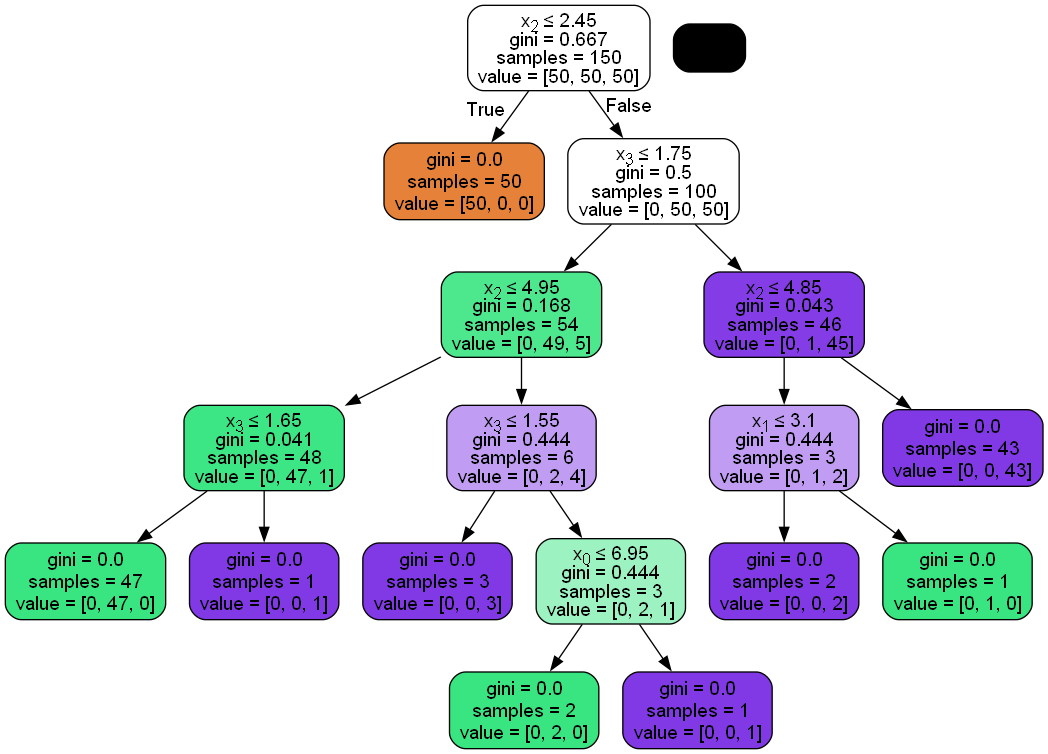

In [34]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import os

dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [18]:
data_1=pd.DataFrame({'sepal length': iris.data[:,0],
'sepal width': iris.data[:,1],
'petal length': iris.data[:,2],
'petal width': iris.data[:,3], 
'species': iris.target})

X=data_1[['sepal length', 'sepal width', 'petal length', 'petal width']]
y=data_1['species']
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) 

In [19]:
clf=RandomForestClassifier(n_estimators=10)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9555555555555556


In [20]:
len(x['Age'])

891

In [21]:
correct=list(filter(lambda i :i if False else None ,list(map(lambda y:y<=3.5,x['Age']))))

In [22]:
len(correct)

0

pruning iris dataset tree

In [31]:
clf=tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.015)
clf=clf.fit(df,y)

In [58]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

visualization of pruned tree

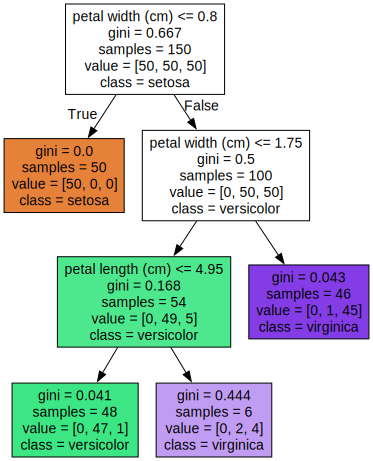

In [32]:
dot_data=tree.export_graphviz(clf,out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
graph=graphviz.Source(dot_data,format="png")
graph